# Seaborn cheetsheet

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,weather,year,month,day
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0,broken clouds,2015,1,4
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0,clear,2015,1,4
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0,clear,2015,1,4
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0,clear,2015,1,4
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0,clear,2015,1,4


In [14]:
df.describe()

,cnt,t1,t2,hum,wind_speed,is_holiday,year,month,day
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,0.022051,2015.507810,6.514643,15.751981
std,1085.108068,5.571818,6.615145,14.313186,7.894570,0.146854,0.508157,3.452509,8.793704
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,0.000000,2015.000000,1.000000,1.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,0.000000,2015.000000,4.000000,8.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,0.000000,2016.000000,7.000000,16.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,0.000000,2016.000000,10.000000,23.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,1.000000,2017.000000,12.000000,31.000000


<Axes: >

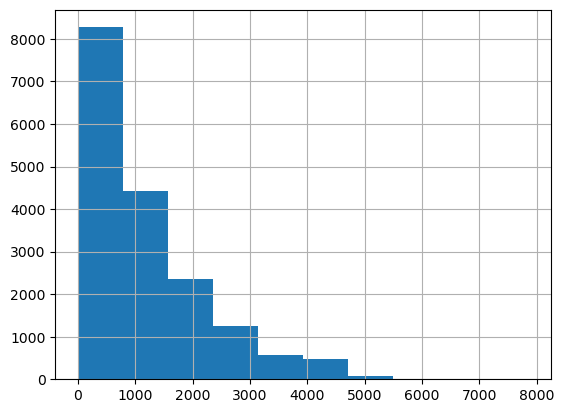

In [15]:
df.cnt.hist()

## sns.histplot

https://seaborn.pydata.org/generated/seaborn.histplot.html

seaborn.histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)

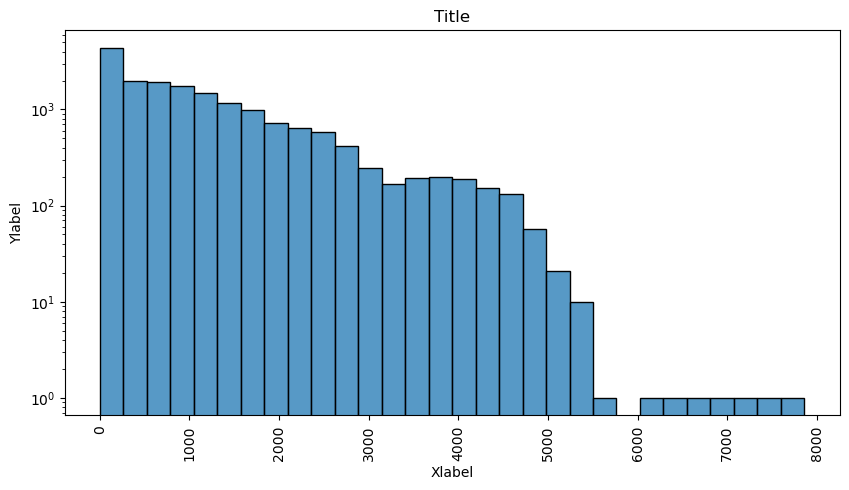

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))

g = sns.histplot(
    ax=ax,
    data=df,
    x='cnt',
    bins=30,
    kde=False
)

ax.set_title('Title')
ax.set_ylabel('Ylabel')
ax.set_xlabel('Xlabel')
ax.set_yscale('log') # log or linear
ax.set_xscale('linear') # log or linear
plt.xticks(rotation=90)

plt.show(g)

## sns.lineplot

https://seaborn.pydata.org/generated/seaborn.lineplot.html

seaborn.lineplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, units=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, seed=None, orient='x', sort=True, err_style='band', err_kws=None, legend='auto', ci='deprecated', ax=None, **kwargs)

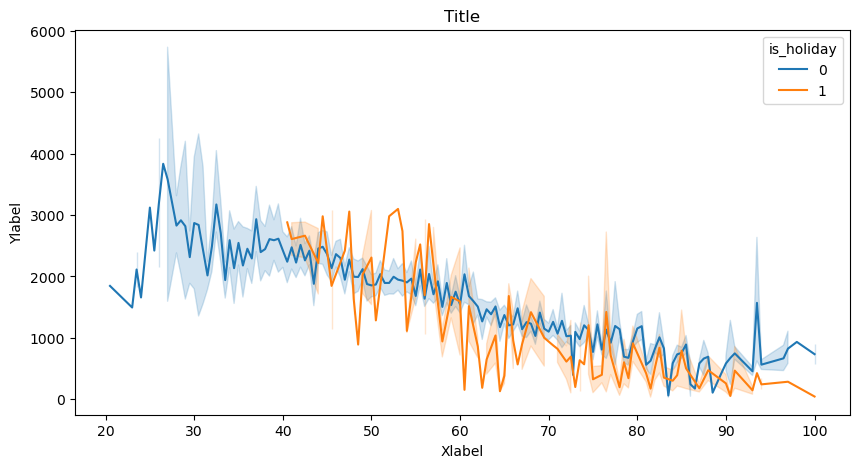

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))

g = sns.lineplot(
    ax=ax,
    data=df,
    x='hum',
    y='cnt',
    hue='is_holiday',
    legend=True
)

ax.set_title('Title')
ax.set_ylabel('Ylabel')
ax.set_xlabel('Xlabel')
ax.set_yscale('linear') # log or linear
ax.set_xscale('linear') # log or linear
plt.xticks(rotation=0)

plt.show(g)

## sns.scatterplot

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

seaborn.scatterplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, legend='auto', ax=None, **kwargs)

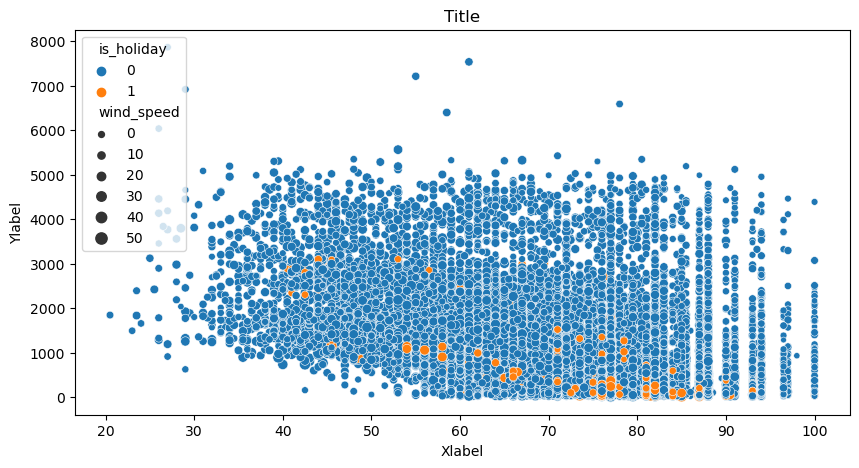

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))

g = sns.scatterplot(
    ax=ax,
    data=df,
    x='hum',
    y='cnt',
    hue='is_holiday',
    size='wind_speed',
    legend=True
)

ax.set_title('Title')
ax.set_ylabel('Ylabel')
ax.set_xlabel('Xlabel')
ax.set_yscale('linear') # log or linear
ax.set_xscale('linear') # log or linear
plt.xticks(rotation=0)

plt.show(g)

## sns.boxplot

https://seaborn.pydata.org/generated/seaborn.boxplot.html

seaborn.boxplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, dodge='auto', width=0.8, gap=0, whis=1.5, linecolor='auto', linewidth=None, fliersize=None, hue_norm=None, native_scale=False, log_scale=None, formatter=None, legend='auto', ax=None, **kwargs)

### How to work with categorical

In [16]:
mult = 100
min_value = 0
max_value = 7901
arr = list(range(min_value, max_value, mult))

def func(x, mult, arr):
    idx = int(x // mult)
    return f'[{arr[idx]};{arr[idx+1]})'

df['cnt_cat'] = df.cnt.apply(lambda x: func(x, mult, arr))

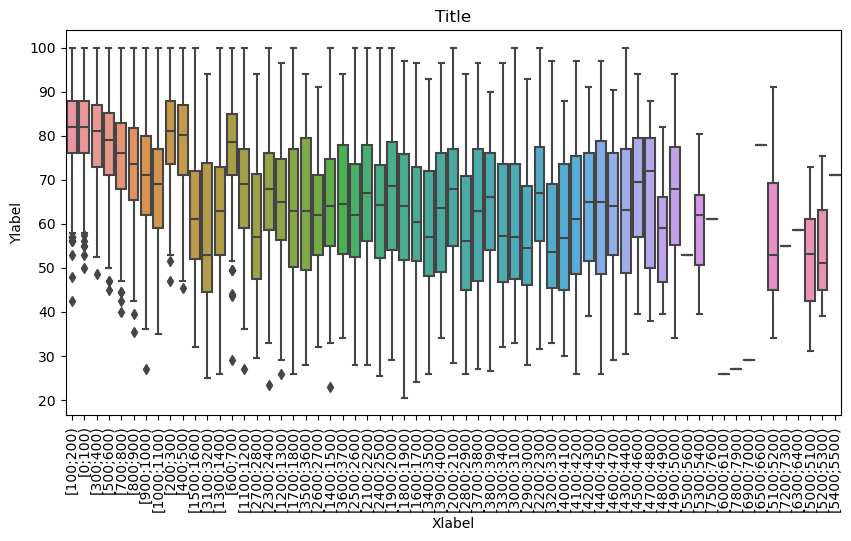

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))

g = sns.boxplot(
    ax=ax,
    data=df,
    x='cnt_cat',
    y='hum'
)

ax.set_title('Title')
ax.set_ylabel('Ylabel')
ax.set_xlabel('Xlabel')
plt.xticks(rotation=90)

plt.show(g)

## sns.heatmap

https://seaborn.pydata.org/generated/seaborn.heatmap.html

seaborn.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)

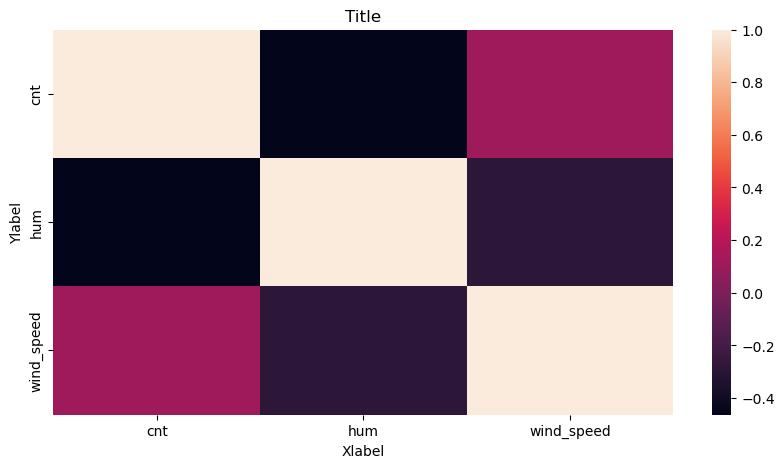

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))

g = sns.heatmap(
    ax=ax,
    data=df[['cnt', 'hum', 'wind_speed']].corr()
)

ax.set_title('Title')
ax.set_ylabel('Ylabel')
ax.set_xlabel('Xlabel')

plt.show(g)

## sns.countplot

https://seaborn.pydata.org/generated/seaborn.countplot.html

seaborn.countplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, hue_norm=None, stat='count', width=0.8, dodge='auto', gap=0, log_scale=None, native_scale=False, formatter=None, legend='auto', ax=None, **kwargs)

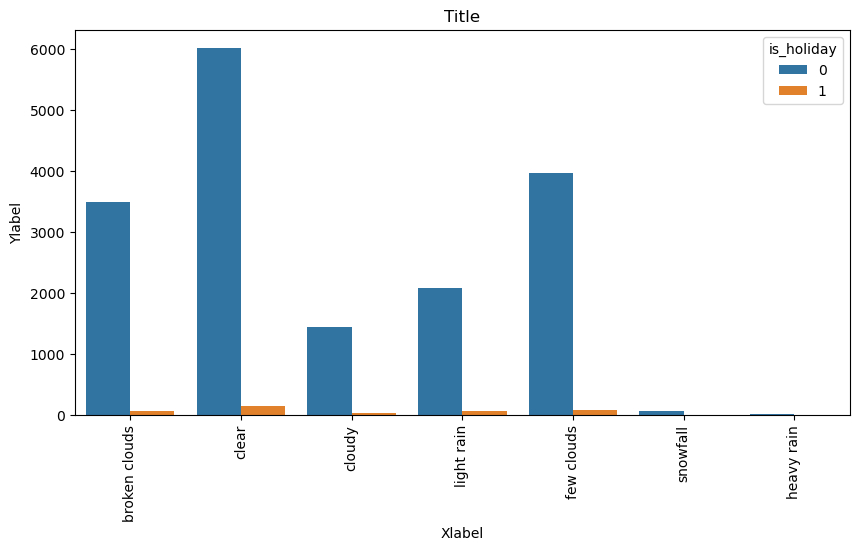

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))

g = sns.countplot(
    ax=ax,
    data=df,
    x='weather',
    hue='is_holiday'
)

ax.set_title('Title')
ax.set_ylabel('Ylabel')
ax.set_xlabel('Xlabel')
plt.xticks(rotation=90)

plt.show(g)

## sns.barplot

https://seaborn.pydata.org/generated/seaborn.barplot.html

seaborn.barplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, hue_norm=None, width=0.8, dodge='auto', gap=0, log_scale=None, native_scale=False, formatter=None, legend='auto', capsize=0, err_kws=None, ci=<deprecated>, errcolor=<deprecated>, errwidth=<deprecated>, ax=None, **kwargs)

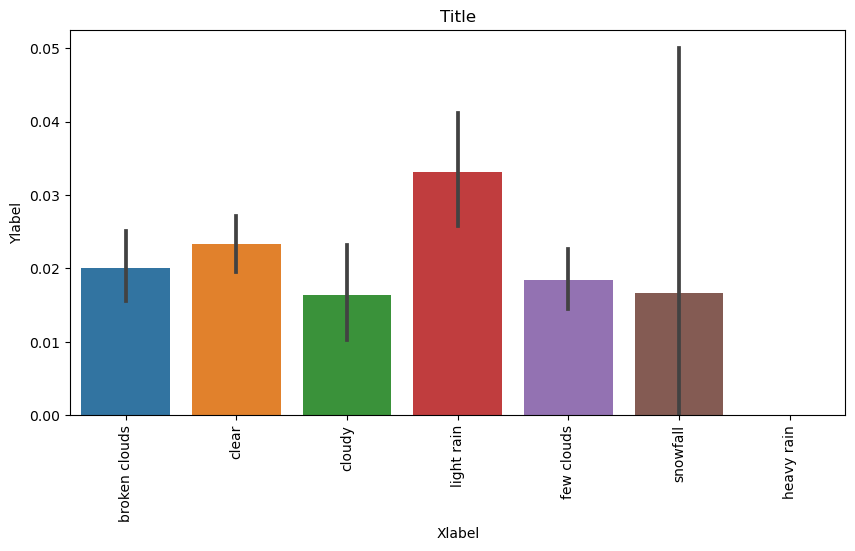

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))

g = sns.barplot(
    ax=ax,
    data=df,
    x='weather',
    y='is_holiday'
)

ax.set_title('Title')
ax.set_ylabel('Ylabel')
ax.set_xlabel('Xlabel')
plt.xticks(rotation=90)

plt.show(g)